In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn import metrics
# this is the baseline model for my bank loan status classification 
# this dataset required encoding ofd several categorical features
# binary features were converted to boolean true and false but first 
# requored normalisation as some data was capitalised and some was not creating 4 unique datapoints where only two existed
# property area was one hot encoded due to 3 categories. loan id feature was dropped as it holds no predictive value


Loading data...
Preparing data
Splitting data
Test distribution of Loan_Status
True     171
False     78
Name: count, dtype: int64
Train distribution of Loan_Status
True     684
False    309
Name: count, dtype: int64
Training model...
LogisticRegression(C=100.0, solver='liblinear')
Testing model...


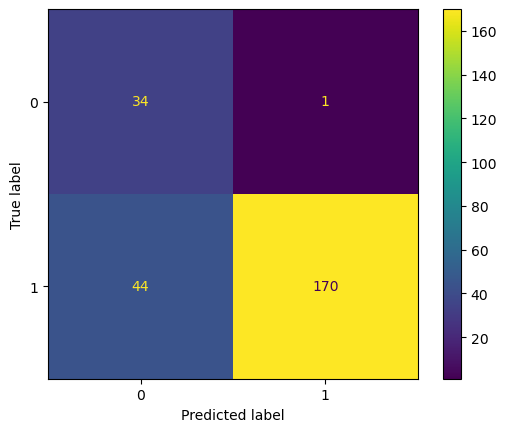

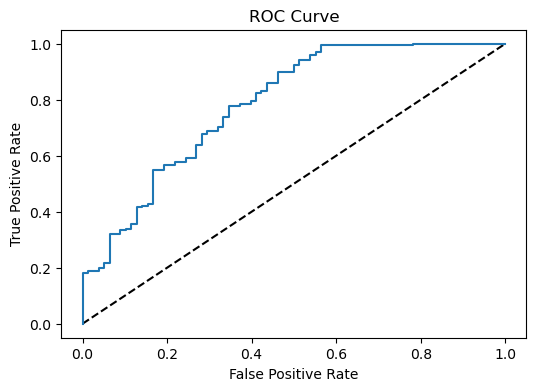


Accuracy:0.8192771084337349
precision:0.794392523364486
recall:0.9941520467836257
f1:0.8831168831168831
AUC:0.7852001799370221



In [11]:
print('Loading data...')
df = pd.read_csv("bank_loan_data.csv")

print('Preparing data')
df=df.drop(columns=['Loan_ID'])
df['Gender'] = df['Gender'].map({'Male': True,'Female': False, 'male':True, 'female':False})
df['Married'] = df['Married'].map({'Yes': True,'No': False, 'yes':True, 'no':False})  
df['Education'] = df['Education'].map({'Graduate': True,'Not Graduate': False, 'graduate':True, 'not graduate':False})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': True,'No': False, 'yes':True, 'no':False})
df['Property_Area'] = df['Property_Area'].replace({'semiurban': 'Semiurban','urban': 'Urban', 'rural':'Rural'})
df['Loan_Status'] = df['Loan_Status'].map({'Y': True,'N': False, 'y':True, 'n':False}) 
df = pd.get_dummies(df, dtype=int)
df

print('Splitting data')
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'])
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42,stratify=y)
print('Test distribution of',y_test.value_counts())
print('Train distribution of',y_train.value_counts())
# dataset is imbaklanced infavor of true so stratify used to improve imbalance which gives minimal improvement

print('Training model...')
model = LogisticRegression(C=1/0.01,solver='liblinear').fit(x_train,y_train)
print(model)

print('Testing model...')
pred = model.predict(x_test)

# Confusion matrix
cm = metrics.confusion_matrix(pred,y_test)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
cmd.plot()
plt.show()
# confusion matrix shows the model overwhelmignly predicts positive over negative due to imbalance
# in future work, this imbalance and more preprocessing and model selection is necessary to correct this

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
# AUC
y_prob = model.predict_proba(x_test)
auc = roc_auc_score(y_test,y_prob[:,1])


# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# very high recall as this model does not miss positives and many times falsly classifies negatives as positives 
# this might be ok in some cases where false negatives are preffered in the case of loan status over false negatives
# giving a loan to someone who less likely to repay is worse than rejecting a loan to someone who might be able to pay
# minimizing risk for the buisness but this model is baseline and still needs improvement as rejecting viable customers is
#also bad for buisness




print(f'''
Accuracy:{accuracy}
precision:{precision}
recall:{recall}
f1:{f1}
AUC:{auc}
''')